# Solving differential equations system 

To solve differential equation system it is again nessecary to perform the following workflow:

1. Define Models
2. Create residual function
3. Find the optimal constants using lmfit


## Step 1 defining the models

The basic procedure is the same, but there are differences:

- The initial conditions (**y0_array**) are defined as array and NOT as scalar
- There are two differential equations defined and **returned** as array

```
y0_array = [100,0]

def dglsys(init_cond_array, t,A0, kA, kB):
    A = init_cond_array[0]
    P = init_cond_array[1]
    dAdt = -kA*A
    dPdt = kB*(A0-(A0-A))
    dzdt = [dAdt, dPdt]
    return dzdt

```

## Step 2 defining the residual function

The residual function calculates the difference between the measured and the modelled values. Of course we need to create the `lmfit.Parameters()` object with the to be determined constants In the case of a **dgl-system** we will receive an array of integrated values and therefore need to also compare arrays with one another:

```
params = lmfit.Parameters()
params.add('kA', 2, min=0.00000001, max=3)
params.add('kP', 2, min=0.0000000001, max=3)

def residual(params, time, data_sets):
    kA = params['kA'].value
    kP = params['kP'].value
    ymodel=odeint(dglsys, y0_array, time, args=(100, kA, kP))
    substr = data_sets[0]-ymodel[:,0] # array 1
    product = data_sets[1]-ymodel[:,1] # array 2
    result = [substr, product] # result is returned as array
    return np.array(result)

```

3. Find the optimal constants using lmfit-minimize

And finally we can fit the constants by the minimize function of lmfit:

- In this case the data array will consist of two columns since we have to fit two different parameters

`solution = lmfit.minimize(residual, params, args=(np.array(time), data))`





   Zeit  Substratkonzentration k1  Produktkonzentration k1  \
0     0                100.000000                 0.000000   
1     1                 81.873075                18.126925   
2     2                 67.032005                32.967995   
3     3                 54.881164                45.118836   
4     4                 44.932896                55.067104   

   Substratkonzentration k2  Substratkonzentration k2.1  Unnamed: 5  \
0                100.000000                  100.000000         NaN   
1                 90.483742                   95.122942         NaN   
2                 81.873075                   90.483742         NaN   
3                 74.081822                   86.070798         NaN   
4                 67.032005                   81.873075         NaN   

  Unnamed: 6  Unnamed: 7 Unnamed: 8  
0         a0      100.00     mmol/L  
1         k1        0.20        NaN  
2         k2        0.10        NaN  
3         k3        0.05        NaN  
4        N

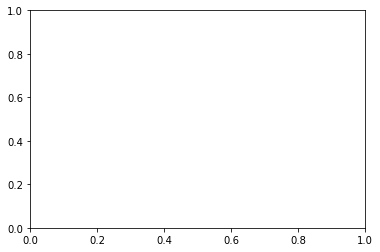

In [60]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit

df = pd.read_excel(r"reaktionen 1 2 ordnung.xlsx")

print(df.head())


time = df["Zeit"]
substrate = df["Substratkonzentration k1"]
product = df["Produktkonzentration k1"]


fix, ax = plt.subplots()

ax.plot(time, substrate, label="Substrate concentration")
ax.plot(time, product, label="product concentration")
#ax.legend()

#plt.show()

(1, 26)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 52
    # variables        = 2
    chi-square         = 6.1578e-14
    reduced chi-square = 1.2316e-15
    Akaike info crit   = -1783.22551
    Bayesian info crit = -1779.32303
[[Variables]]
    kA:  0.20000000 +/- 5.2456e-11 (0.00%) (init = 2)
    kP:  0.20000000 +/- 4.5226e-11 (0.00%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kA, kP) = 0.931
None


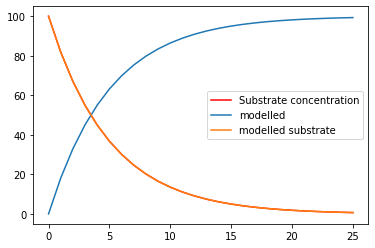

In [83]:
# Definition of DGL system
# A = Initial conditions
# t = time or x-values
# kA = Constant A
# kB = Constant B
y0 = 100



data_list = [substrate, product]

data = np.array(data_list)



y0_array = [100,0]

def dglsys(init_cond_array, t,A0, kA, kB):
    A = init_cond_array[0]
    P = init_cond_array[1]
    dAdt = -kA*A
    dPdt = kB*(A0-(A0-A))
    dzdt = [dAdt, dPdt]
    return dzdt

sol = odeint(dglsys, y0_array, time, args=(100,0.2, 0.2))
#print(sol)
print(np.array([time]).shape)
#print(data[0])


params = lmfit.Parameters()
params.add('kA', 2, min=0.00000001, max=3)
params.add('kP', 2, min=0.0000000001, max=3)

def residual(params, time, data_sets):
    kA = params['kA'].value
    kP = params['kP'].value
    ymodel=odeint(dglsys, y0_array, time, args=(100, kA, kP))
    substr = data_sets[0]-ymodel[:,0] # array 1
    product = data_sets[1]-ymodel[:,1] # array 2
    result = [substr, product] # result is returned as array
    return np.array(result)

solution = lmfit.minimize(residual, params, args=(np.array(time), data))
print(lmfit.report_fit(solution))


fig, ax = plt.subplots()
ax.plot(time, substrate, label="Substrate concentration", color="red")
ax.plot(time, sol[:,1], label="modelled")
ax.plot(time, sol[:,0], label="modelled substrate")
ax.legend()

plt.show()